# GUI MODEL

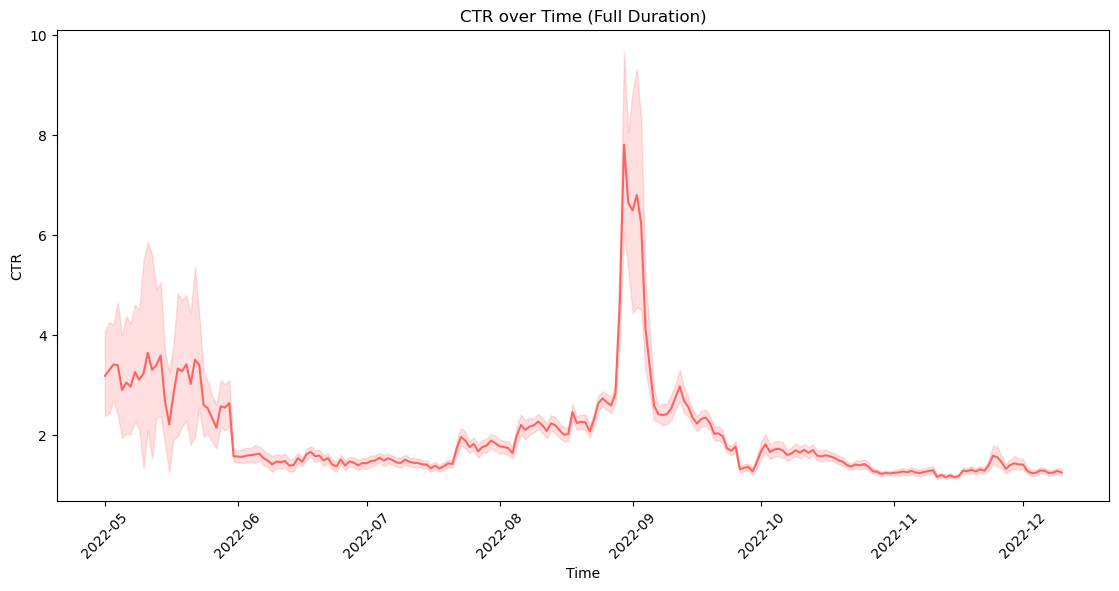

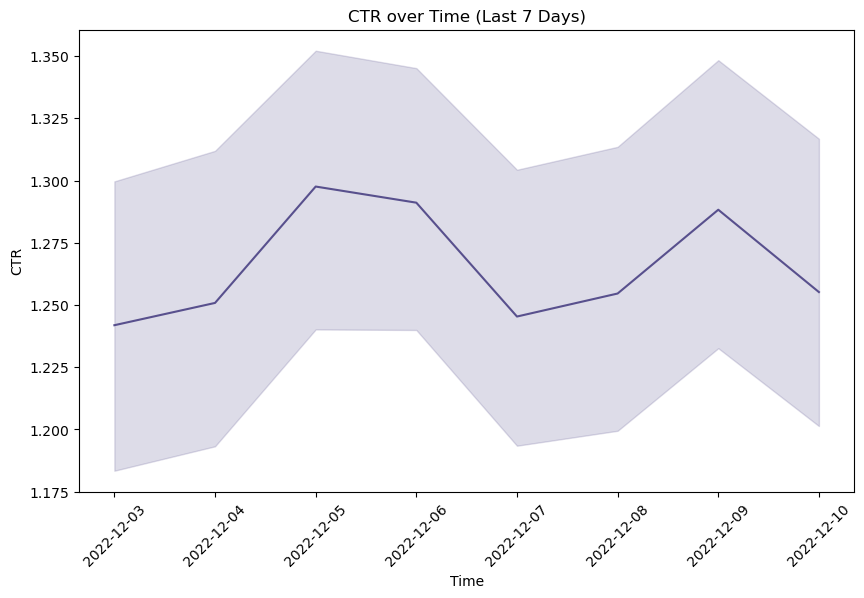

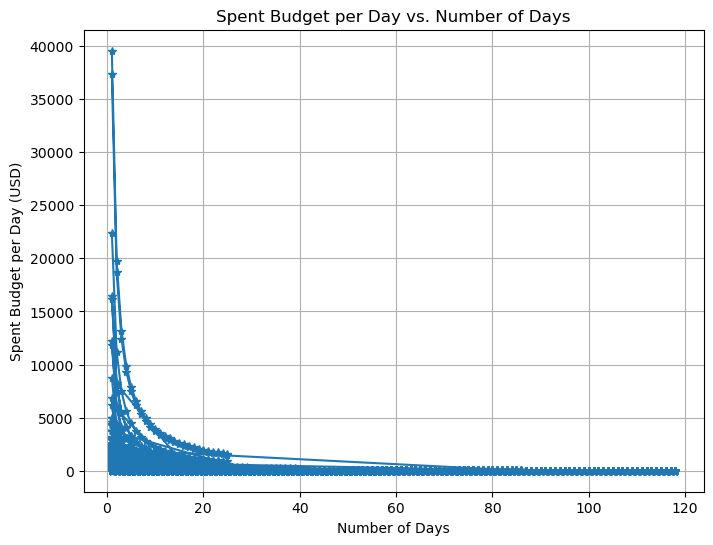

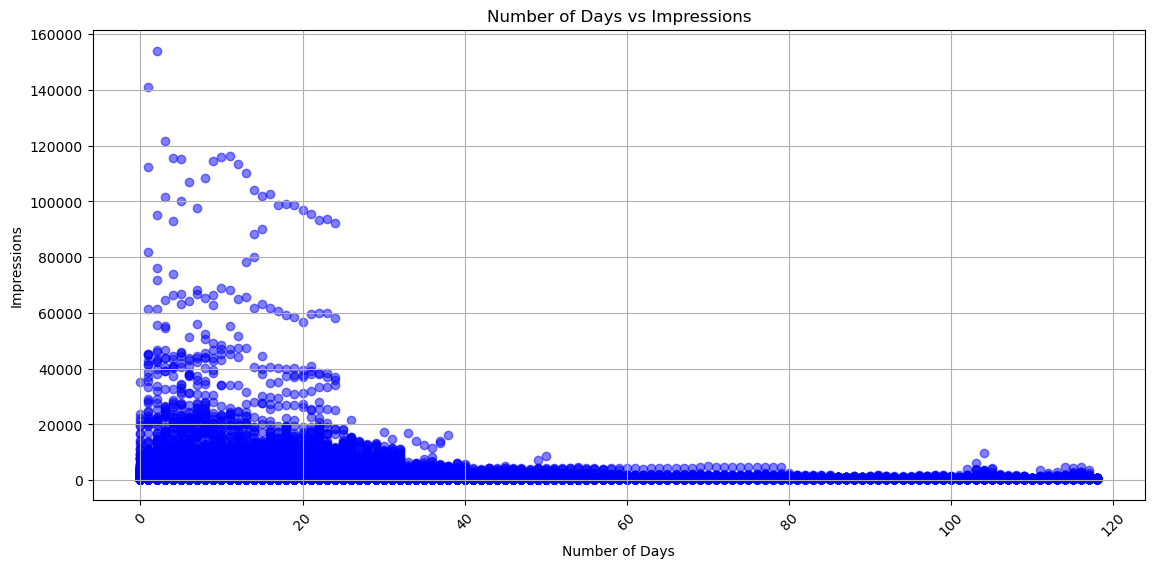

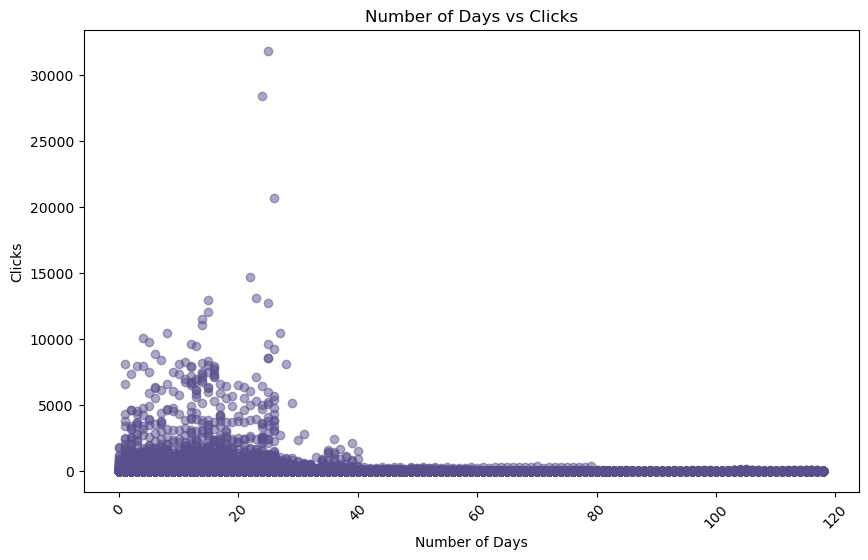

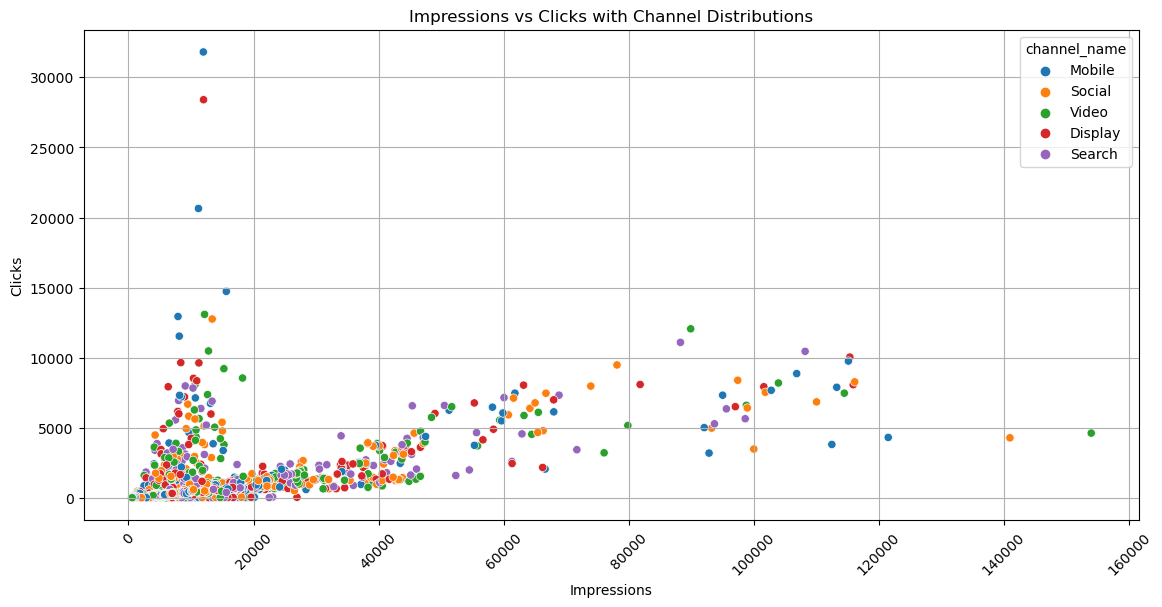

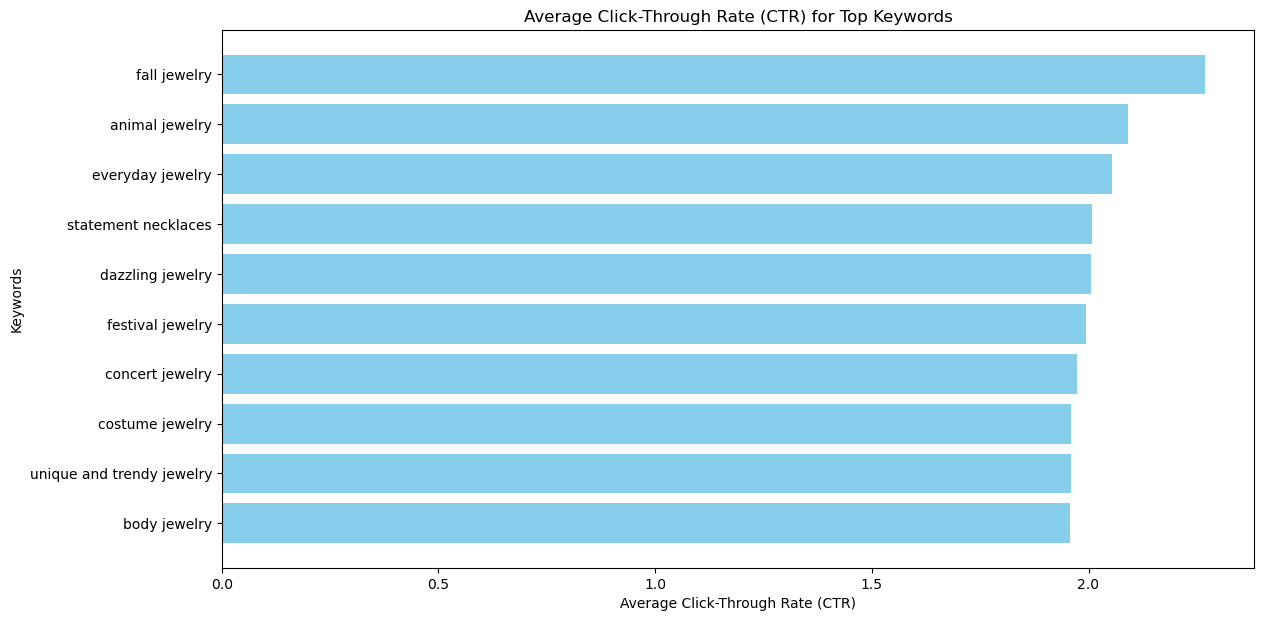

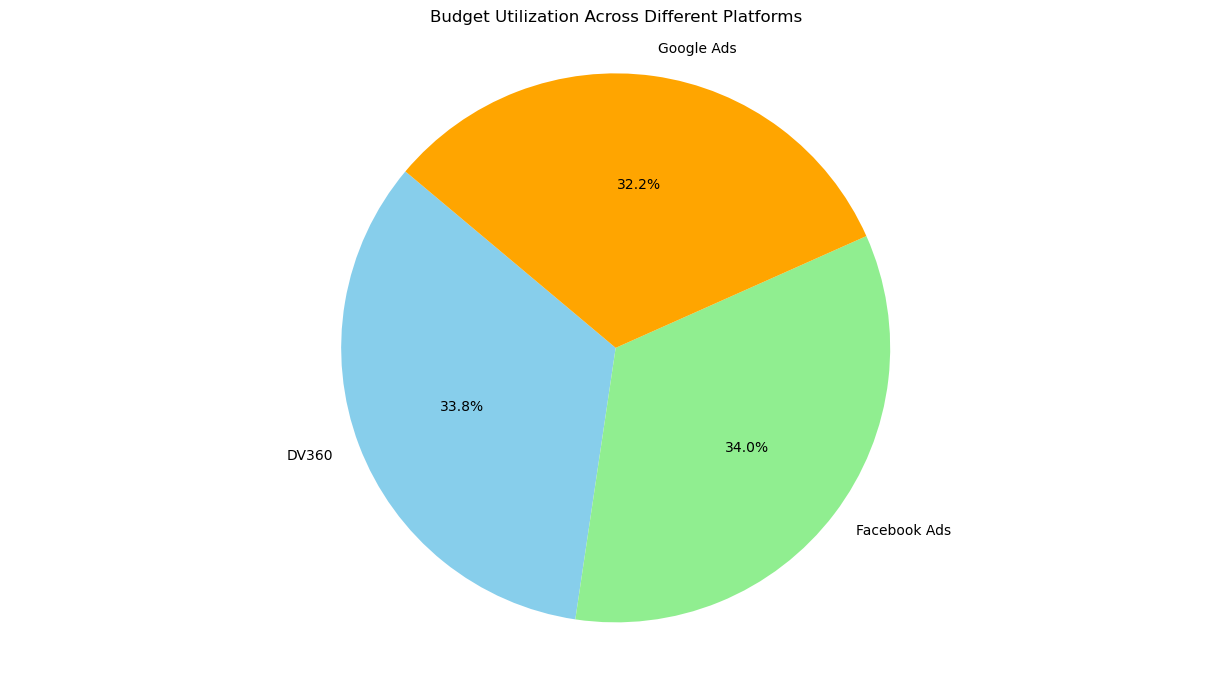

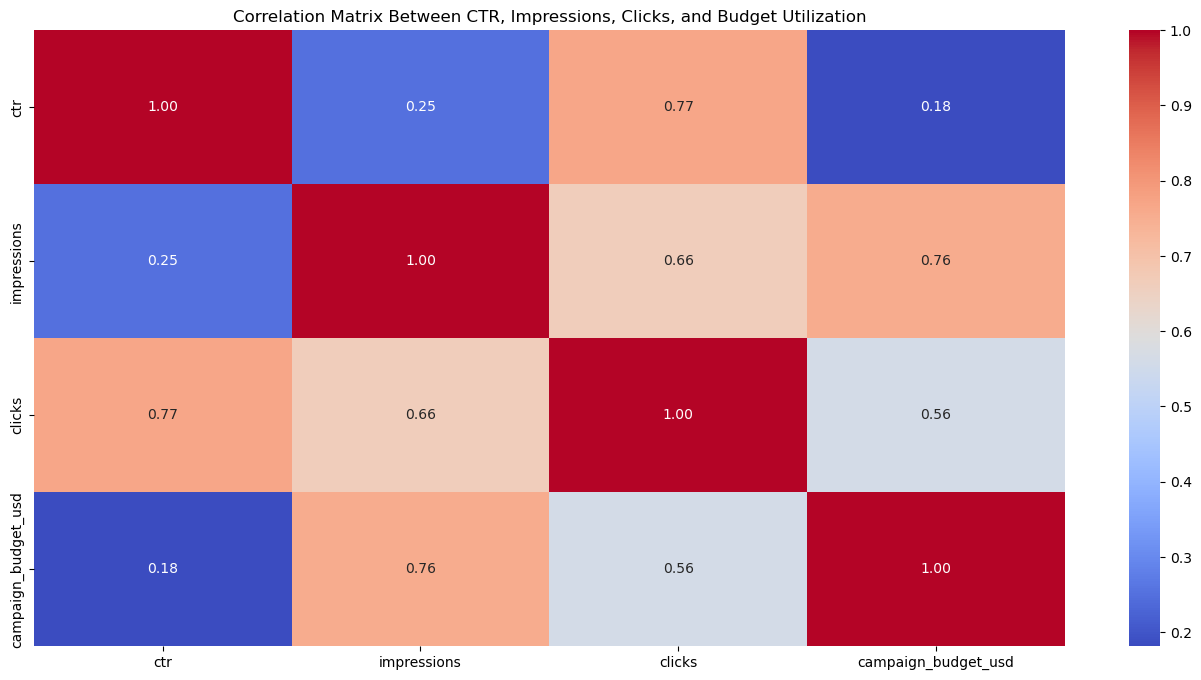

In [1]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

class AdsCTRAnalysisApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Ads CTR Analysis")
        self.data = None
        self.filtered_data = None

        # Import CSV Button
        self.import_button = tk.Button(master, text="Import CSV", command=self.import_csv)
        self.import_button.grid(row=0, column=0, padx=10, pady=10, sticky="ew")

        # Analysis Button
        self.analysis_button = tk.Button(master, text="Analysis", command=self.analysis_window)
        self.analysis_button.grid(row=1, column=0, padx=10, pady=10, sticky="ew")

        # Filter Data Button
        self.filter_button = tk.Button(master, text="Filter Data", command=self.filter_data_window)
        self.filter_button.grid(row=2, column=0, padx=10, pady=10, sticky="ew")

        # Data Summary Button
        self.data_summary_button = tk.Button(master, text="Filtered Data Summary", command=self.display_data_summary)
        self.data_summary_button.grid(row=3, column=0, padx=10, pady=10, sticky="ew")

        # Visualizations Button
        self.visualizations_button = tk.Button(master, text="Visualizations", command=self.show_visualizations)
        self.visualizations_button.grid(row=4, column=0, padx=10, pady=10, sticky="ew")

        # Close Button
        self.close_button = tk.Button(master, text="Close", command=self.close_window)
        self.close_button.grid(row=5, column=0, padx=10, pady=10, sticky="ew")

        # Data Label
        self.data_label = tk.Label(master, text="")
        self.data_label.grid(row=0, column=1, columnspan=2, padx=10, pady=10, sticky="ew")

        # Initialize filtered data window
        self.filtered_data_window = None


    # Function to import CSV file
    def import_csv(self):
        file_path = filedialog.askopenfilename()
        if file_path:
            try:
                # Read the CSV file into a pandas DataFrame
                self.data = pd.read_csv(file_path, low_memory=False)

                # Perform data cleaning and preprocessing
                self.data = self.clean_and_preprocess_data(self.data)

                self.data_label.config(text="CSV file imported successfully.")
            except Exception as e:
                messagebox.showerror("Error", f"Error while importing CSV file: {e}")
        else:
            self.data_label.config(text="No file selected.")

    # Function to clean and preprocess the data
    def clean_and_preprocess_data(self, data):
        data['time'] = pd.to_datetime(data['time'])

        # Fill missing values with 0 for specific columns
        data['creative_width'].fillna(0, inplace=True)
        data['creative_height'].fillna(0, inplace=True)
        data['template_id'].fillna(0, inplace=True)
        data['approved_budget'].fillna(0, inplace=True)

        # Drop columns with more than 80% missing values
        data.drop(columns=['position_in_content', 'unique_reach', 'total_reach', 'max_bid_cpm'], inplace=True)

        # Calculate CTR
        data['ctr'] = (data['clicks'] / data['impressions']) * 100

        # Calculate spent_budget_per_day
        data['spent_budget_per_day'] = data['campaign_budget_usd'] / data['no_of_days']

        return data

    # Function to open analysis window
    def analysis_window(self):
        analysis_window = tk.Toplevel(self.master)
        analysis_window.title("Analysis")

        # Create notebook (tabs)
        notebook = ttk.Notebook(analysis_window)

        # Add tabs
        self.add_campaign_performance_tab(notebook)
        self.add_trend_analysis_tab(notebook)
        self.add_channel_distribution_tab(notebook)
        self.add_budget_utilization_tab(notebook)
        self.add_keyword_analysis_tab(notebook)
        self.add_correlation_insights_tab(notebook)

        notebook.pack(expand=True, fill="both")

    
    # Function to add Campaign Performance tab
    def add_campaign_performance_tab(self, notebook):
        tab = ttk.Frame(notebook)
        notebook.add(tab, text="Campaign Performance")
        # Add content for campaign performance analysis here

    
    # Create another notebook for sub-tabs
        sub_notebook = ttk.Notebook(tab)
        sub_notebook.pack(expand=True, fill="both")

    # Add CTR over Time (Full Duration) tab
        self.add_ctr_over_time_full_duration_tab(sub_notebook)

    # Add CTR over Time (Last 7 Days) tab
        self.add_ctr_over_time_last_7_days_tab(sub_notebook)

    # Add Spent Budget per day vs. Number of Days tab
        self.add_spent_budget_vs_days_tab(sub_notebook)

    # Function to add CTR Over Time (Full Duration) tab
    def add_ctr_over_time_full_duration_tab(self, notebook):
        tab = ttk.Frame(notebook)
        notebook.add(tab, text="CTR Over Time (Full Duration)")
    # Add content for CTR over time (full duration) analysis here
        plt.figure(figsize=(8, 6))
        sns.lineplot(x='time', y='ctr', data=self.data, color='#FF6361')
        plt.title('CTR over Time (Full Duration)')
        plt.xlabel('Time')
        plt.ylabel('CTR')
        plt.xticks(rotation=45)
        canvas = FigureCanvasTkAgg(plt.gcf(), master=tab)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, tab)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

     # Function to add CTR Over Time (Last 7 Days) tab
    def add_ctr_over_time_last_7_days_tab(self, notebook):
        tab = ttk.Frame(notebook)
        notebook.add(tab, text="CTR Over Time (Last 7 Days)")
   
        last_7_days = pd.to_datetime(self.data['time'].max()) - pd.DateOffset(days=7)
        df_last_7_days = self.data[self.data['time'] >= last_7_days]

        plt.figure(figsize=(10, 6))
        sns.lineplot(x='time', y='ctr', data=df_last_7_days, color='#58508D')
        plt.title('CTR over Time (Last 7 Days)')
        plt.xlabel('Time')
        plt.ylabel('CTR')
        plt.xticks(rotation=45)

        canvas = FigureCanvasTkAgg(plt.gcf(), master=tab)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, tab)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

    # Function to add Spent Budget per day vs. Number of Days tab
    def add_spent_budget_vs_days_tab(self, notebook):
        tab = ttk.Frame(notebook)
        notebook.add(tab, text="Spent Budget per day vs. Number of Days")
    
        plt.figure(figsize=(8, 6))
        plt.plot(self.data['no_of_days'], self.data['spent_budget_per_day'], marker='*')
        plt.xlabel("Number of Days")
        plt.ylabel("Spent Budget per Day (USD)")
        plt.title("Spent Budget per Day vs. Number of Days")
        plt.grid(True)
        canvas = FigureCanvasTkAgg(plt.gcf(), master=tab)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, tab)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)


    # Function to add Trend Analysis tab
    def add_trend_analysis_tab(self, notebook):
        tab = ttk.Frame(notebook)
        notebook.add(tab, text="Trend Analysis")

        # Create another notebook for sub-tabs
        sub_notebook = ttk.Notebook(tab)
        sub_notebook.pack(expand=True, fill="both")

        self.add_impressions_over_time_tab(sub_notebook)
        self.add_clicks_over_time_tab(sub_notebook)

    # Function to add Impressions Over Time tab
    def add_impressions_over_time_tab(self, notebook):
        tab = ttk.Frame(notebook)
        notebook.add(tab, text="Impressions Over Time")
        plt.figure(figsize=(8, 6))
        plt.scatter(self.data['no_of_days'], self.data['impressions'], color='blue', alpha=0.5)
        plt.title('Number of Days vs Impressions')
        plt.xlabel('Number of Days') 
        plt.ylabel('Impressions')
        plt.xticks(rotation=45)
        plt.grid(True)
        canvas = FigureCanvasTkAgg(plt.gcf(), master=tab)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, tab)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

    # Function to add Clicks Over Time tab
    def add_clicks_over_time_tab(self, notebook):
        tab = ttk.Frame(notebook)
        notebook.add(tab, text="Clicks Over Time")
        # Add content for clicks over time analysis here
        plt.figure(figsize=(10, 6))
        plt.scatter(self.data['no_of_days'], self.data['clicks'], color='#58508D', alpha=0.5)
        plt.title('Number of Days vs Clicks')
        plt.xlabel('Number of Days')
        plt.ylabel('Clicks')
        plt.xticks(rotation=45)

        canvas = FigureCanvasTkAgg(plt.gcf(), master=tab)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, tab)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)


    # Function to add Channel Distribution tab
    def add_channel_distribution_tab(self, notebook):
        tab = ttk.Frame(notebook)
        notebook.add(tab, text="Channel Distribution")
        # Add content for channel distribution analysis here
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x="impressions", y="clicks", data=self.data, hue='channel_name')

        plt.xlabel('Impressions')
        plt.ylabel('Clicks')
        plt.title('Impressions vs Clicks with Channel Distributions')
        plt.xticks(rotation=45)
        plt.grid(True)

        canvas = FigureCanvasTkAgg(plt.gcf(), master=tab)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True) 
        toolbar = NavigationToolbar2Tk(canvas, tab)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)


    # Function to add Keyword Analysis tab
    def add_keyword_analysis_tab(self, notebook):
        tab = ttk.Frame(notebook)
        notebook.add(tab, text="Keyword Analysis")
      
        # Group by keywords and calculate average CTR for each keyword
        keyword_ctr = self.data.groupby('keywords')['ctr'].mean().reset_index()

        # Sort keywords based on average CTR in descending order
        keyword_ctr_sorted = keyword_ctr.sort_values(by='ctr', ascending=False)

        # Plotting the bar chart
        plt.figure(figsize=(10, 6))
        plt.barh(keyword_ctr_sorted['keywords'][:10], keyword_ctr_sorted['ctr'][:10], color='skyblue')
        plt.xlabel('Average Click-Through Rate (CTR)')
        plt.ylabel('Keywords')
        plt.title('Average Click-Through Rate (CTR) for Top Keywords') 
        plt.gca().invert_yaxis()  # Invert y-axis to display highest CTR at the top
        plt.tight_layout()

        # Create a Tkinter canvas for the plot
        canvas = FigureCanvasTkAgg(plt.gcf(), master=tab) 
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, tab)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)


    # Function to add Budget Utilization tab
    def add_budget_utilization_tab(self, notebook):
        tab = ttk.Frame(notebook)
        notebook.add(tab, text="Budget Utilization")
       
        # Group by ext_service_name and sum the media_cost_usd for each platform
        platform_budget = self.data.groupby('ext_service_name')['media_cost_usd'].sum().reset_index()

    # Plotting the pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(platform_budget['media_cost_usd'], labels=platform_budget['ext_service_name'], autopct='%1.1f%%', 
            startangle=140, colors=['skyblue', 'lightgreen', 'orange', 'salmon'])
        plt.title('Budget Utilization Across Different Platforms')
        plt.axis('equal')  
        plt.tight_layout()

    # Create a Tkinter canvas for the plot
        canvas = FigureCanvasTkAgg(plt.gcf(), master=tab)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, tab)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

    # Function to add Correlation Insights tab
    def add_correlation_insights_tab(self, notebook):
        tab = ttk.Frame(notebook)
        notebook.add(tab, text="Correlation Insights")
      
        # Calculate correlation matrix
        correlation_matrix = self.data[['ctr', 'impressions', 'clicks', 'campaign_budget_usd']].corr()

    # Plotting the heatmap for correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix Between CTR, Impressions, Clicks, and Budget Utilization')
        plt.tight_layout()

    # Create a Tkinter canvas for the plot
        canvas = FigureCanvasTkAgg(plt.gcf(), master=tab)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, tab)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

    # Function to open filter data window
    def filter_data_window(self):
        self.filter_window = tk.Toplevel(self.master)
        self.filter_window.title("Filter Data")

        # Start Date Label and Entry
        self.start_date_label = tk.Label(self.filter_window, text="Start Date")
        self.start_date_label.grid(row=0, column=0, padx=10, pady=5, sticky="w")
        self.start_date_entry = tk.Entry(self.filter_window)
        self.start_date_entry.grid(row=0, column=1, padx=10, pady=5)

        # End Date Label and Entry
        self.end_date_label = tk.Label(self.filter_window, text="End Date")
        self.end_date_label.grid(row=1, column=0, padx=10, pady=5, sticky="w")
        self.end_date_entry = tk.Entry(self.filter_window)
        self.end_date_entry.grid(row=1, column=1, padx=10, pady=5)

        # Apply Filter Button
        self.apply_filter_button = tk.Button(self.filter_window, text="Apply Filter", command=self.filter_data)
        self.apply_filter_button.grid(row=2, column=0, columnspan=2, padx=10, pady=10, sticky="ew")

    # Function to filter data
    def filter_data(self):
        try:
            start_date_str = self.start_date_entry.get()
            end_date_str = self.end_date_entry.get()

            # Convert date strings to Timestamp objects
            start_date = pd.to_datetime(start_date_str)
            end_date = pd.to_datetime(end_date_str)

            # Ensure start date is less than or equal to end date
            if start_date > end_date:
                messagebox.showerror("Error", "Start date should be less than or equal to end date.")
                return

            # Filter the cleaned data based on the date range
            self.filtered_data = self.data[(self.data['time'] >= start_date) & (self.data['time'] <= end_date)]

            # Close the filter window
            self.filter_window.destroy()

            # Show success message
            messagebox.showinfo("Filter Applied", "Data filtered successfully.")

            # Display filtered data in a new window
            self.display_filtered_data()

        except Exception as e:
            messagebox.showerror("Error", f"Error occurred while filtering data: {e}")

    # Function to display filtered data in a new window
    def display_filtered_data(self):
        if self.filtered_data_window is None:
            self.filtered_data_window = tk.Toplevel(self.master)
            self.filtered_data_window.title("Filtered Data")

            # Create a frame to contain the Treeview and scrollbar
            frame = tk.Frame(self.filtered_data_window)
            frame.pack(fill="both", expand=True)

            # Create Treeview widget
            columns = list(self.filtered_data.columns)
            self.filtered_treeview = ttk.Treeview(frame, columns=columns, show="headings")
            self.filtered_treeview.pack(side="left", fill="both", expand=True)

            # Add column headings
            for col in columns:
                self.filtered_treeview.heading(col, text=col)

            # Add data to Treeview
            for index, row in self.filtered_data.iterrows():
                self.filtered_treeview.insert("", "end", values=row.tolist())

            # Add horizontal and vertical scrollbars
            xscrollbar = ttk.Scrollbar(frame, orient="horizontal", command=self.filtered_treeview.xview)
            xscrollbar.pack(side="bottom", fill="x")
            self.filtered_treeview.configure(xscrollcommand=xscrollbar.set)

            yscrollbar = ttk.Scrollbar(frame, orient="vertical", command=self.filtered_treeview.yview)
            yscrollbar.pack(side="right", fill="y")
            self.filtered_treeview.configure(yscrollcommand=yscrollbar.set)

        else:
            # Clear previous content
            self.filtered_treeview.delete(*self.filtered_treeview.get_children())

            # Add updated data
            for index, row in self.filtered_data.iterrows():
                self.filtered_treeview.insert("", "end", values=row.tolist())

      # Function to display data summary
    def display_data_summary(self):
        if self.data is not None:
            summary = self.filtered_data.describe()

        # Create a new Tkinter window for displaying the data summary
            summary_window = tk.Toplevel(self.master)
            summary_window.title("Filtered Data Summary")
        # Maximize the window
            summary_window.state("zoomed")

        # Create a Text widget for displaying the summary
            summary_text = tk.Text(summary_window, wrap="none")
            summary_text.pack(fill="both", expand=True)

        # Insert summary text into the Text widget
            summary_text.insert("1.0", str(summary))

        # Add horizontal scrollbar
            xscrollbar = ttk.Scrollbar(summary_window, orient="horizontal", command=summary_text.xview)
            xscrollbar.pack(side="bottom", fill="x")
            summary_text.config(xscrollcommand=xscrollbar.set)

        else:
            messagebox.showerror("Error", "No filtered data available to summarize.")


    # Function to show visualizations
    def show_visualizations(self):
        if self.filtered_data is not None:
            self.visualization_window = tk.Toplevel(self.master)
            self.visualization_window.title("Visualizations")

            # Create a canvas to contain the plots
            canvas = tk.Canvas(self.visualization_window, width=1000, height=800)
            canvas.pack(side="left", fill="both", expand=True)

            # Add a vertical scrollbar
            scrollbar = ttk.Scrollbar(self.visualization_window, orient="vertical", command=canvas.yview)
            scrollbar.pack(side="right", fill="y")
            canvas.configure(yscrollcommand=scrollbar.set)

            # Create a frame inside the canvas to hold the plots
            frame = tk.Frame(canvas)
            canvas.create_window((0, 0), window=frame, anchor="nw")

            # Plot all visualizations
            self.plot_visualizations(frame)

            # Update canvas scroll region
            frame.update_idletasks()
            canvas.configure(scrollregion=canvas.bbox("all"))

        else:
            messagebox.showerror("Error", "No filtered data available for visualization.")

    # Function to plot visualizations
    def plot_visualizations(self, frame):
        # CTR over Time
        self.plot_ctr_over_time(frame)

        # Spent Budget per Day vs Number of Days
        self.plot_spent_budget_vs_days(frame)

        # Scatter Plot: Number of Days vs Impressions
        self.plot_days_vs_impressions(frame)

        # Scatter Plot: Number of Days vs Clicks
        self.plot_days_vs_clicks(frame)

        # Scatter Plot: Impressions vs Clicks with Channel Distributions
        self.plot_impressions_vs_clicks_with_channels(frame)

        # Keyword Analysis: Average Click-Through Rates for Top Keywords
        self.plot_keyword_analysis(frame)

        # Budget Allocation Across Different Platforms
        self.plot_budget_allocation(frame)

    # Function to plot CTR over Time
    def plot_ctr_over_time(self, frame):
        plt.figure(figsize=(8, 6))
        sns.lineplot(x='time', y='ctr', data=self.filtered_data, color='#FF6361')
        plt.title('CTR over Time (Filtered Dataset)')
        plt.xlabel('Time')
        plt.ylabel('CTR')
        plt.xticks(rotation=45)
        canvas = FigureCanvasTkAgg(plt.gcf(), master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, frame)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

    # Function to plot Spent Budget per Day vs Number of Days
    def plot_spent_budget_vs_days(self, frame):
        plt.figure(figsize=(8, 6))
        plt.plot(self.filtered_data['no_of_days'], self.filtered_data['spent_budget_per_day'], marker='*')
        plt.xlabel("Number of Days")
        plt.ylabel("Spent Budget per Day (USD)")
        plt.title("Spent Budget per Day vs. Number of Days (Filtered Dataset)")
        plt.grid(True)
        canvas = FigureCanvasTkAgg(plt.gcf(), master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, frame)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

    # Function to plot Scatter Plot: Number of Days vs Impressions
    def plot_days_vs_impressions(self, frame):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=self.filtered_data, x="no_of_days", y="impressions")
        plt.xlabel("Number of Days")
        plt.ylabel("Impressions")
        plt.title("Number of Days vs Impressions (Filtered Dataset)")
        plt.grid(True)
        canvas = FigureCanvasTkAgg(plt.gcf(), master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, frame)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

    # Function to plot Scatter Plot: Number of Days vs Clicks
    def plot_days_vs_clicks(self, frame):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=self.filtered_data, x="no_of_days", y="clicks")
        plt.xlabel("Number of Days")
        plt.ylabel("Clicks")
        plt.title("Number of Days vs Clicks (Filtered Dataset)")
        plt.grid(True)
        canvas = FigureCanvasTkAgg(plt.gcf(), master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, frame)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

    # Function to plot Scatter Plot: Impressions vs Clicks with Channel Distributions
    def plot_impressions_vs_clicks_with_channels(self, frame):
        plt.figure(figsize=(8, 6))
        sns.lmplot(x="impressions", y="clicks", data=self.filtered_data, fit_reg=False, hue='channel_name')
        plt.xlabel("Impressions")
        plt.ylabel("Clicks")
        plt.title("Impressions vs Clicks with Channel Distributions (Filtered Dataset)")
        plt.grid(True)
        canvas = FigureCanvasTkAgg(plt.gcf(), master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, frame)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

    # Function to plot Keyword Analysis: Average Click-Through Rates for Top Keywords
    def plot_keyword_analysis(self, frame):
        keyword_ctr = self.filtered_data.groupby('keywords')['ctr'].mean().reset_index()
        keyword_ctr_sorted = keyword_ctr.sort_values(by='ctr', ascending=False)
        plt.figure(figsize=(8, 6))
        plt.barh(keyword_ctr_sorted['keywords'][:10], keyword_ctr_sorted['ctr'][:10], color='skyblue')
        plt.xlabel('Average Click-Through Rate (CTR)')
        plt.ylabel('Keywords')
        plt.title('Average Click-Through Rate (CTR) for Top Keywords (Filtered Dataset)')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        canvas = FigureCanvasTkAgg(plt.gcf(), master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        toolbar = NavigationToolbar2Tk(canvas, frame)
        toolbar.update()
        canvas.get_tk_widget().pack(side="top", fill="both", expand=True)

    # Function to plot Budget Allocation Across Different Platforms
    def plot_budget_allocation(self, frame):
        if self.filtered_data is not None:
            platform_budget = self.filtered_data.groupby('ext_service_name')['media_cost_usd'].sum().reset_index()

            plt.figure(figsize=(8, 6))
            plt.pie(platform_budget['media_cost_usd'], labels=platform_budget['ext_service_name'], autopct='%1.1f%%', 
            startangle=140, colors=['skyblue', 'lightgreen', 'orange', 'salmon'])
            plt.title('Budget Allocation Across Different Platforms (Filtered Dataset)')
            plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            plt.tight_layout()

        # Create a Tkinter canvas for the plot
            canvas = FigureCanvasTkAgg(plt.gcf(), master=frame)
            canvas.draw()
            canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
            toolbar = NavigationToolbar2Tk(canvas, frame)
            toolbar.update()
            canvas.get_tk_widget().pack(side="top", fill="both", expand=True)
        else:
            messagebox.showerror("Error", "No filtered data available for analysis.")
    # Function to close the window
    def close_window(self):
        self.master.destroy()


# Create the Tkinter window
root = tk.Tk()
app = AdsCTRAnalysisApp(root)
root.mainloop()


